# Sharded Cellpose Segmentation on human protein atlas images with downsampling

In [1]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import ShardedCytosolSegmentationDownsamplingCellpose
from scportrait.pipeline.selection import LMDSelection

/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project_location = "project_downsampling_sharded"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example2.yml",
    overwrite=True,
    debug=True,
    segmentation_f=ShardedCytosolSegmentationDownsamplingCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[21/02/2025 15:11:44] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/config.yml
[21/02/2025 15:11:44] Compression algorithm: lzf
[21/02/2025 15:11:44] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2.
[21/02/2025 15:11:44] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2.


In [3]:
from scportrait.data._datasets import dataset_2

dataset_2_path = dataset_2()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_2_path}/Ch1.tif", f"{dataset_2_path}/Ch2.tif", f"{dataset_2_path }/Ch3.tif"]

project.load_input_from_tif_files(images)

[21/02/2025 15:11:44] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampli
         ng_sharded/scportrait.sdata                                                                               


[21/02/2025 15:11:44] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/Project_43y1s0la for Project
[21/02/2025 15:11:44] Image input_image written to sdata object.
[21/02/2025 15:11:44] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/Project_43y1s0la'>


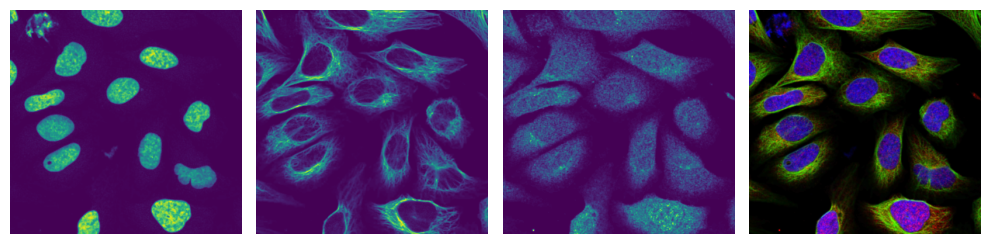

In [4]:
# visualize input images as example
# it is not recommended to execute this block with large input images as it will compute for some time


def colorize(im, color, clip_percentile=0.0):
    """
    Helper function to create an RGB image from a single-channel image using a
    specific color.
    """
    # Check that we do just have a 2D image
    if im.ndim > 2 and im.shape[2] != 1:
        raise ValueError("This function expects a single-channel image!")

    # Rescale the image according to how we want to display it
    im_scaled = im.astype(np.float32) - np.percentile(im, clip_percentile)
    im_scaled = im_scaled / np.percentile(im_scaled, 100 - clip_percentile)
    im_scaled = np.clip(im_scaled, 0, 1)

    # Need to make sure we have a channels dimension for the multiplication to work
    im_scaled = np.atleast_3d(im_scaled)

    # Reshape the color (here, we assume channels last)
    color = np.asarray(color).reshape((1, 1, -1))
    return im_scaled * color


def generate_composite(images, colors=None, plot=False):
    if colors is None:
        colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0), (1, 0, 1)]
    colorized = []
    for image, color in zip(images, colors, strict=False):
        image = colorize(image, color, 0.0)
        colorized.append(image)

    if plot:
        for i in colorized:
            plt.figure()
            plt.imshow(i)

    image = colorized[0]
    for i in range(len(colorized) - 1):
        image += colorized[i + 1]

    return np.clip(image, 0, 1)


fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].imshow(project.input_image[0])
axs[0].axis("off")

axs[1].imshow(project.input_image[1])
axs[1].axis("off")

axs[2].imshow(project.input_image[2])
axs[2].axis("off")

img = generate_composite(project.input_image)

axs[3].imshow(img)
axs[3].axis("off")

fig.tight_layout()

In [5]:
project.segment()

[21/02/2025 15:11:45] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./ShardedCytosolSegmentationDownsamplingCellpose_xc4hf2tn for ShardedCytosolSegmentationDownsamplingCellpose
[21/02/2025 15:11:45] Mapped input image to memory-mapped array.
[21/02/2025 15:11:45] Created new shard directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/segmentation/tiles
[21/02/2025 15:11:45] target size 2000000 is equal or larger to input image 86710. Sharding will not be used.
[21/02/2025 15:11:45] Saving Sharding plan to file: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/segmentation/sharding_plan.csv
[21/02/2025 15:11:45] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CytosolSegmentationDownsamplingCellpose_t1ii6rjt for CytosolSegmentationDownsamplingCellpose
[21/02/2025 15:11:45] s

Segmenting Image Tiles:   0%|          | 0/1 [00:00<?, ?it/s]

[21/02/2025 15:11:49] Beginning Segmentation of Shard with the slicing (slice(0, 290, None), slice(0, 299, None))
[21/02/2025 15:11:49] Time taken to load input image: 0.004421916091814637
[21/02/2025 15:11:49] Smoothing Kernel size not explicitly defined. Will calculate a default value based on the downsampling factor.
[21/02/2025 15:11:49] Performing image padding to ensure that image is compatible with selected downsample kernel size of 2.
[21/02/2025 15:11:49] Downsampling image by a factor of 2x2
[21/02/2025 15:11:49] GPU Status for segmentation is True and will segment using the following device mps.
[21/02/2025 15:11:49] Segmenting nucleus using the following model: nuclei
[21/02/2025 15:11:51] Segmenting cytosol using the following model: cyto2


/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[21/02/2025 15:11:52] Performing filtering to match Cytosol and Nucleus IDs.
[21/02/2025 15:11:52] Removed 1 nuclei and 0 cytosols due to filtering.
[21/02/2025 15:11:52] After filtering, 9 matching nuclei and cytosol masks remain.


Segmenting Image Tiles: 100%|██████████| 1/1 [00:07<00:00,  7.73s/it]

[21/02/2025 15:11:52] Total time to perform nucleus and cytosol mask matching filtering: 0.52 seconds
[21/02/2025 15:11:52] Filtering status for this segmentation is set to True.
[21/02/2025 15:11:52] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[21/02/2025 15:11:52] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/segmentation/tiles/0/classes.csv.
[21/02/2025 15:11:52] === Finished segmentation of shard ===
[21/02/2025 15:11:52] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CytosolSegmentationDownsamplingCellpose_t1ii6rjt'>
[21/02/2025 15:11:52] Segmentation of Shard with the slicing (slice(0, 290, None), slice(0, 299, None)) finished


[21/02/2025 15:11:53] Finished parallel segmentation
[21/02/2025 15:11:53] resolve sharding plan
[21/02/2025 15:11:53] Cleared temporary directory containing input image used for sharding.
[21/02/2025 15:11:53] Stitching tile 0
[21/02/2025 15:11:54] Time taken to cleanup overlapping shard regions for shard 0: 0.0018754005432128906s
[21/02/2025 15:11:54] Number of classes contained in shard after processing: 9
[21/02/2025 15:11:54] Number of Ids in filtered_classes after adding shard 0: 9
[21/02/2025 15:11:54] Finished stitching tile 0 in 0.7472939491271973 seconds.
[21/02/2025 15:11:54] Number of filtered classes in Dataset: 9
[21/02/2025 15:11:54] Filtering status for this segmentation is set to True.
[21/02/2025 15:11:54] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[21/02/2025 15:11:54] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_dow

In [6]:
plt.figure()
plt.imshow(project.sdata["seg_all_nucleus"])
plt.axis("off")

plt.figure()
plt.imshow(project.sdata["seg_all_cytosol"])
plt.axis("off")

KeyError: "Could not find element with name 'seg_all_nucleus'"

<Figure size 640x480 with 0 Axes>

In [ ]:
project.extract()

[21/02/2025 14:52:36] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_fhjtbjbj for HDF5CellExtraction
[21/02/2025 14:52:36] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/extraction/data
[21/02/2025 14:52:36] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/extraction/data
[21/02/2025 14:52:36] Found 2 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus', 'seg_all_cytosol']
[21/02/2025 14:52:36] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[21/02/2025 14:52:36] Extraction Details:
[21/02/2025 14:52:36] --------------------------------
[21/02/2025 14:52:36] Number of input image channels: 3
[21/02/2025 14:52:36]

Extracting cell batches: 100%|██████████| 1/1 [00:00<00:00, 23.15it/s]


[21/02/2025 14:52:36] Finished extraction in 0.07 seconds (132.51 cells / second)
[21/02/2025 14:52:36] Transferring results to final HDF5 data container.
[21/02/2025 14:52:36] number of cells too close to image edges to extract: 1
[21/02/2025 14:52:36] A total of 1 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/extraction/removed_classes.csv.
[21/02/2025 14:52:36] Transferring extracted single cells to .hdf5
[21/02/2025 14:52:36] single-cell index created.


Transferring single cell images to HDF5: 100%|██████████| 8/8 [00:00<00:00, 5697.81it/s]

[21/02/2025 14:52:36] single-cell data created
[21/02/2025 14:52:36] single-cell index labelled created.
[21/02/2025 14:52:36] channel information created.


[21/02/2025 14:52:36] Benchmarking times saved to file.
[21/02/2025 14:52:36] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_fhjtbjbj'>


(8, 5, 110, 110)


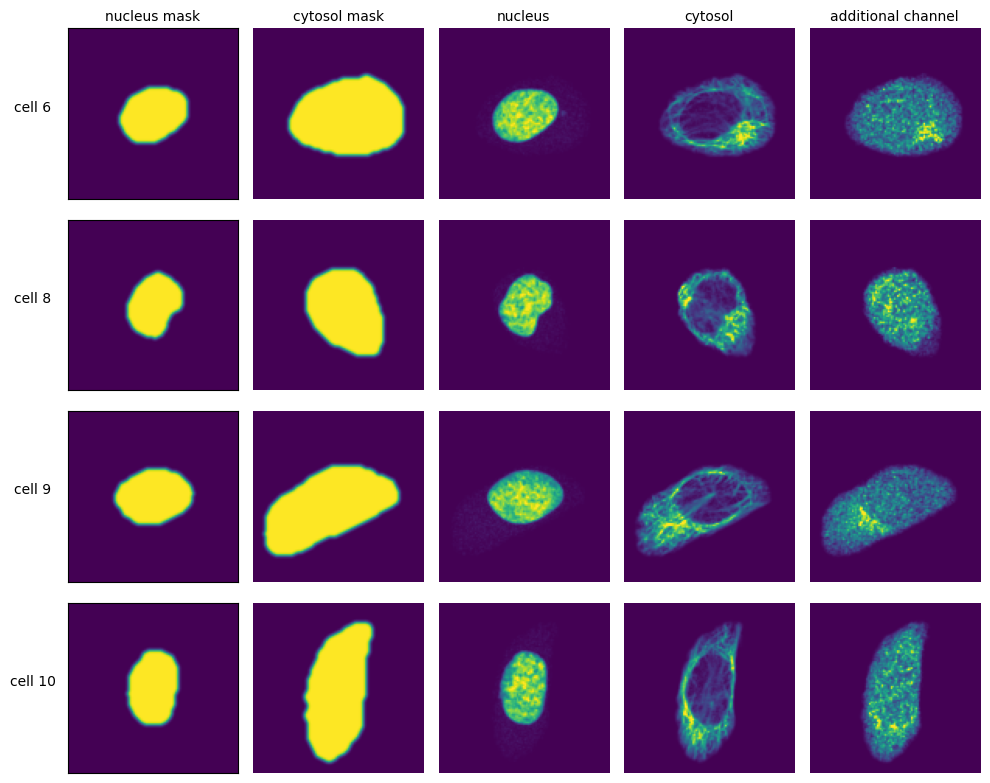

In [ ]:
with h5py.File(f"{project_location}/extraction/data/single_cells.h5") as hf:
    index = hf.get("single_cell_index")
    images = hf.get("single_cell_data")

    print(images.shape)

    n_cells = [2, 3, 4, 5]
    fig, axs = plt.subplots(len(n_cells), 5, figsize=(5 * 2, len(n_cells) * 2))
    labels = ["nucleus mask", "cytosol mask", "nucleus", "cytosol", "additional channel"]

    for i, id in enumerate(n_cells):
        cell_id = index[id][1]
        image = images[id]

        for n, _img in enumerate(image):
            axs[i, n].imshow(_img)

            if n == 0:
                axs[i, n].set_ylabel(f"cell {cell_id}", fontsize=10, rotation=0, labelpad=25)
                axs[i, n].xaxis.set_visible(False)
                axs[i, n].tick_params(left=False, labelleft=False)
            else:
                axs[i, n].axis("off")

            if i == 0:
                axs[i, n].set_title(labels[n], fontsize=10)

    fig.tight_layout()

In [ ]:
project.featurize()

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/extraction/data/single_cells.h5
[21/02/2025 14:52:37] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/CellFeaturizer_36tn_ce0 for CellFeaturizer
[21/02/2025 14:52:37] Started CellFeaturization of all available channels.
[21/02/2025 14:52:37] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/featurization/complete_CellFeaturizer
[21/02/2025 14:52:37] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[21/02/2025 14:52:37] Reading data from path: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling_sharded/extraction/data/single_cells.h5
[21/02/2025 

In [ ]:
# load classification results
results = pd.read_csv(f"{project_location}/featurization/complete_CellFeaturizer/calculated_image_features.csv")
results

,nucleus_area,cytosol_area,cytosol_only_area,1_mean_nucleus,1_median_nucleus,1_quant75_nucleus,1_quant25_nucleus,1_summed_intensity_nucleus,1_summed_intensity_area_normalized_nucleus,1_mean_cytosol,...,3_summed_intensity_cytosol,3_summed_intensity_area_normalized_cytosol,3_mean_cytosol_only,3_median_cytosol_only,3_quant75_cytosol_only,3_quant25_cytosol_only,3_summed_intensity_cytosol_only,3_summed_intensity_area_normalized_cytosol_only,label,cell_id
0,2171.0,6501.0,4330.0,0.084096,0.0,0.022125,0.0,1017.56177,0.235003,0.084096,...,1495.06420,0.345280,0.123559,0.0,0.236328,0.0,1495.06420,0.345280,0,3
1,1912.0,4568.0,2656.0,0.066100,0.0,0.008980,0.0,799.81310,0.301134,0.066100,...,1334.21410,0.502340,0.110266,0.0,0.107361,0.0,1334.21410,0.502340,0,4
2,1888.0,3983.0,2095.0,0.072569,0.0,0.003801,0.0,878.08400,0.419133,0.072569,...,1103.27330,0.526622,0.091180,0.0,0.050079,0.0,1103.27330,0.526622,0,6
3,1718.0,3012.0,1294.0,0.061052,0.0,0.000000,0.0,738.73190,0.570890,0.061052,...,917.94150,0.709383,0.075863,0.0,0.000000,0.0,917.94150,0.709383,0,8
4,2096.0,4286.0,2190.0,0.077765,0.0,0.006078,0.0,940.95050,0.429658,0.077765,...,1061.77780,0.484830,0.087750,0.0,0.073730,0.0,1061.77780,0.484830,0,9
5,1945.0,3873.0,1928.0,0.068763,0.0,0.000335,0.0,832.03723,0.431555,0.068763,...,1152.72970,0.597889,0.095267,0.0,0.004980,0.0,1152.72970,0.597889,0,10
6,1954.0,3678.0,1724.0,0.065520,0.0,0.000228,0.0,792.79370,0.459857,0.065520,...,882.31335,0.511783,0.072918,0.0,0.002060,0.0,882.31335,0.511783,0,11
7,2165.0,4542.0,2377.0,0.071315,0.0,0.013641,0.0,862.91614,0.363027,0.071315,...,1117.84480,0.470276,0.092384,0.0,0.122437,0.0,1117.84480,0.470276,0,12
